Упражнение 1.2

In [47]:
import os
from thinkdsp import read_wave
from thinkdsp import decorate

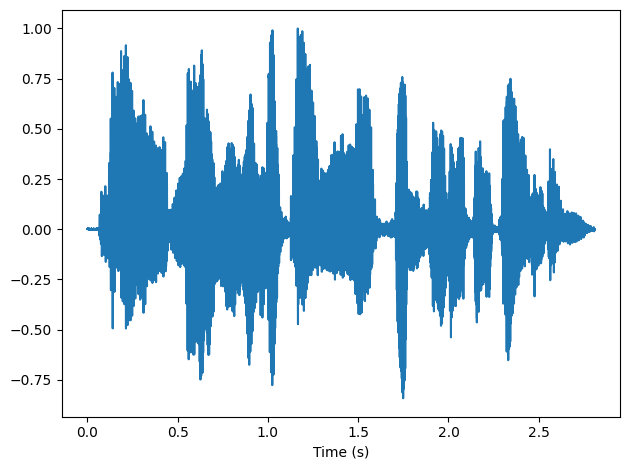

In [48]:
filename = '105977__wcfl10__favorite-station.wav'
wave = read_wave(filename)
wave.plot()
decorate(xlabel = "Time (s)")
wave.make_audio()

Сегмент сигнала длиной 0.67 секунд:

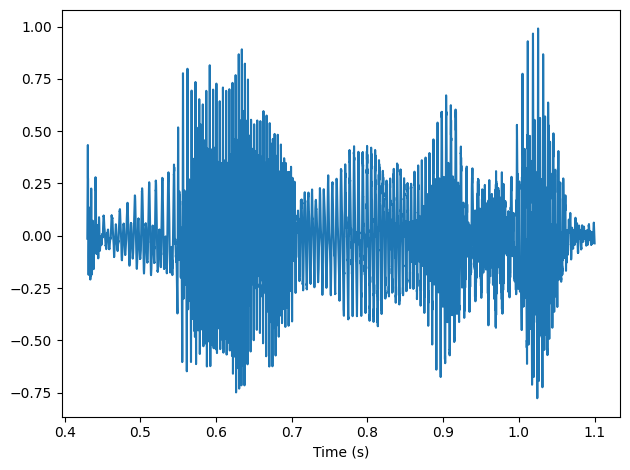

In [49]:
segment = wave.segment(0.43, 1.1 - 0.43)
segment.plot()
decorate(xlabel = "Time (s)")
segment.make_audio()

Спектр выбранного сигнала:

Можно предположить, что чем богаче и разнообразнее гармоническая структура, видимая в спектре, тем более насыщенным и узнаваемым является тембр.

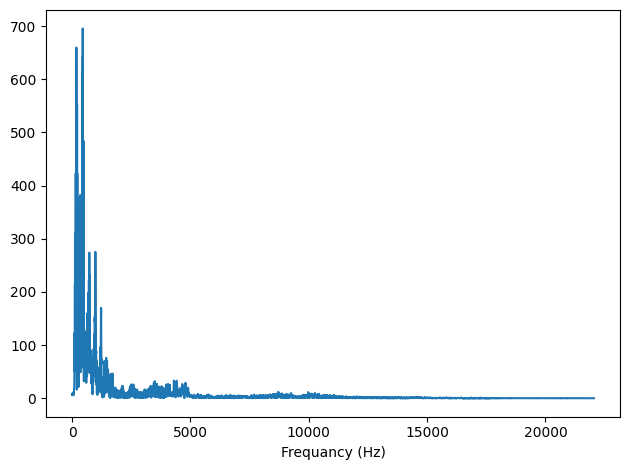

In [50]:
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel = 'Frequancy (Hz)')

Масштабированный спектр сигнала:

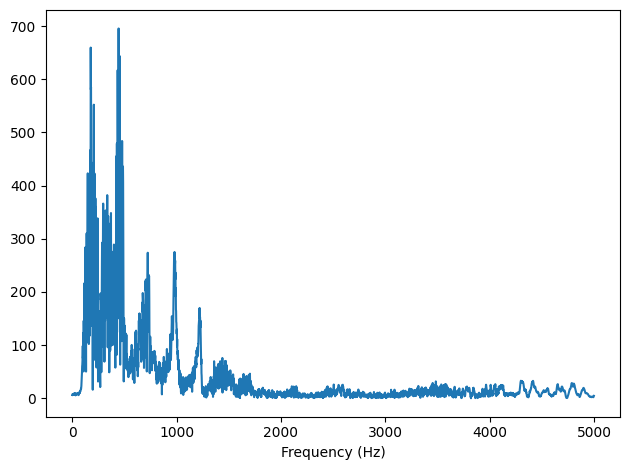

In [51]:
spectrum.plot(high = 5000)
decorate(xlabel = 'Frequency (Hz)')

Копирование спектра сигнала в переменные для последующего применения различных фильтров:

In [52]:
spectrumForHigh = segment.make_spectrum()
spectrumForLow = segment.make_spectrum()
spectrumForBand = segment.make_spectrum()

ФНЧ

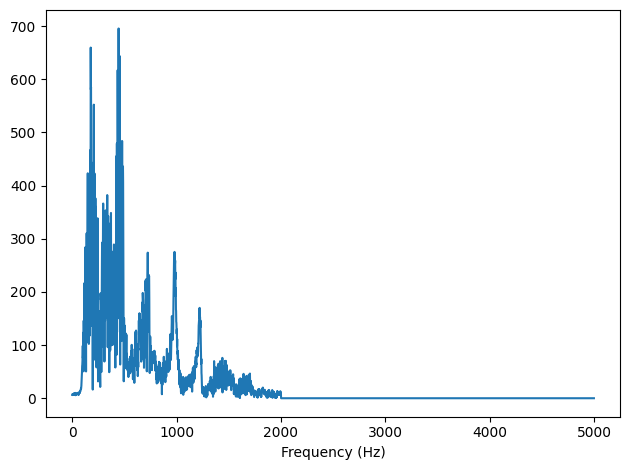

In [53]:
spectrumForLow.low_pass(2000)
spectrumForLow.plot(high = 5000)
decorate(xlabel='Frequency (Hz)')

ФВЧ

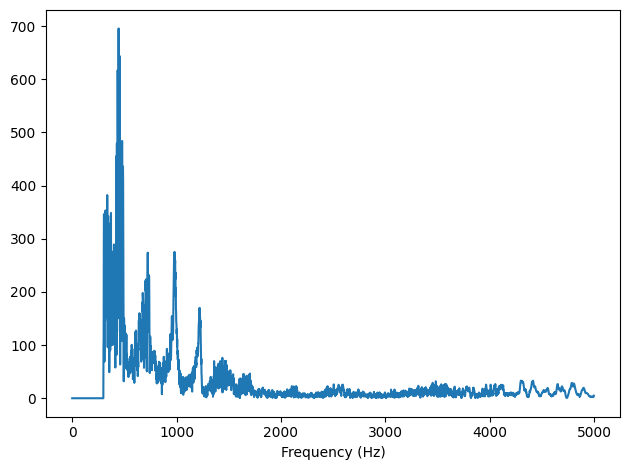

In [54]:
spectrumForHigh.high_pass(300)
spectrumForHigh.plot(high = 5000)
decorate(xlabel='Frequency (Hz)')

ФПЗ

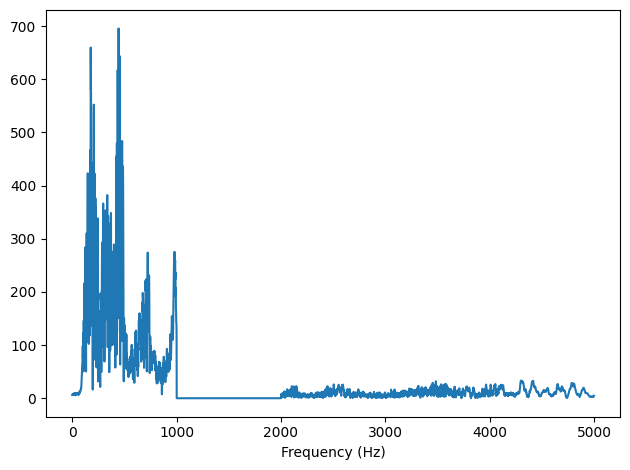

In [55]:
spectrumForBand.band_stop(1000, 2000)
spectrumForBand.plot(high = 5000)
decorate(xlabel='Frequency (Hz)')

Сигнал после применения ФНЧ:

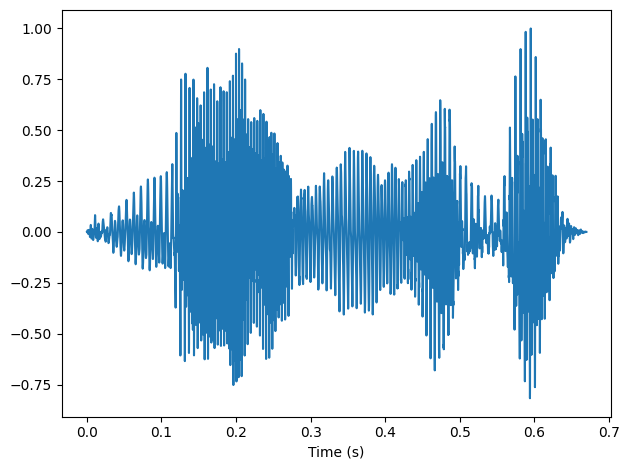

In [56]:
filtredLow = spectrumForLow.make_wave()
filtredLow.normalize()
filtredLow.apodize()
filtredLow.plot()
decorate(xlabel='Time (s)')
filtredLow.make_audio()

Сигнал после применения ФВЧ:

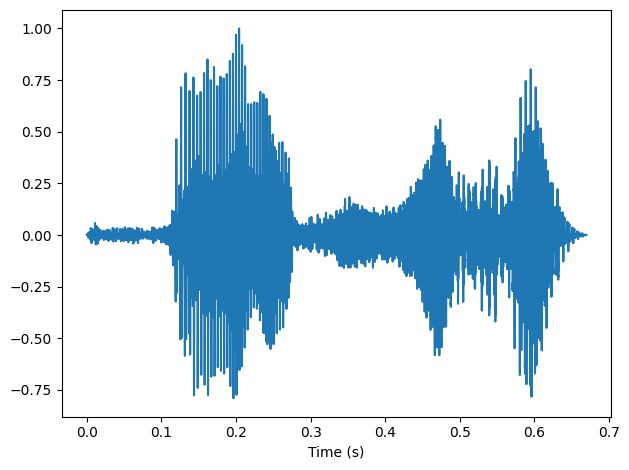

In [57]:
filtredHigh = spectrumForHigh.make_wave()
filtredHigh.normalize()
filtredHigh.apodize()
filtredHigh.plot()
decorate(xlabel='Time (s)')
filtredHigh.make_audio()

Сигнал после применения ФПЗ:

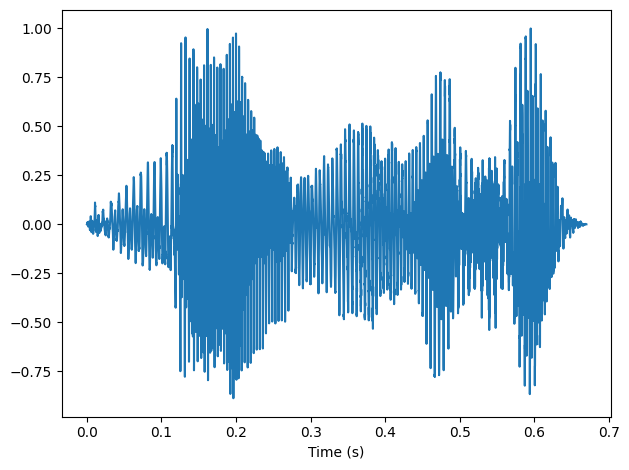

In [58]:
filtredBand = spectrumForBand.make_wave()
filtredBand.normalize()
filtredBand.apodize()
filtredBand.plot()
decorate(xlabel='Time (s)')
filtredBand.make_audio()

После применения ФНЧ, и соответственно удаления высокочастотных гармоник, звук стал более "плоским".

Применив ФВЧ, основная частота сигнала стала выше, и звук стал более "резким".

Применение ФПЗ привело к тому что звуковой сигнал стал содержать в себе фоновый писк.

Упражнение 1.3

In [59]:
from thinkdsp import CosSignal, SinSignal

Создание используемых объектов:

In [60]:
cosSig1 = CosSignal(freq = 200, amp = 2.0, offset = 0)
cosSig2 = CosSignal(freq = 400, amp = 0.5, offset = 0)
cosSig3 = CosSignal(freq = 600, amp = 1.0, offset = 0)

sinSig1 = SinSignal(freq = 800, amp = 0.3, offset = 0)
sinSig2 = SinSignal(freq = 1000, amp = 0.2, offset = 0)
sinSig3 = SinSignal(freq = 1200, amp = 0.1, offset = 0)

nfSinSig1 = SinSignal(freq = 333, amp = 0.5, offset = 0)
nfSinSig2 = SinSignal(freq = 666, amp = 0.5, offset = 0)
nfSinSig3 = SinSignal(freq = 999, amp = 0.5, offset = 0)

nfCosSig1 = CosSignal(freq = 222, amp = 0.5, offset = 0)
nfCosSig2 = CosSignal(freq = 444, amp = 0.5, offset = 0)
nfCosSig3 = CosSignal(freq = 666, amp = 0.5, offset = 0)

Создание сложного сигнала с частотными компонентами, кратными основным:

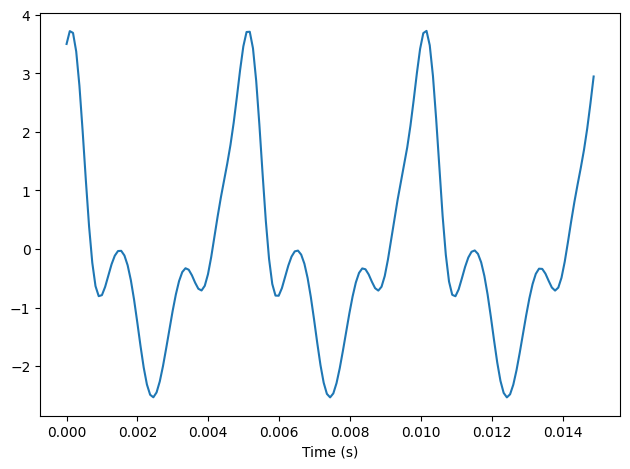

In [61]:
complexSignal = cosSig1 + cosSig2 + cosSig3 + sinSig1 + sinSig2 + sinSig3
complexSignal.plot()
decorate(xlabel = "Time (s)")

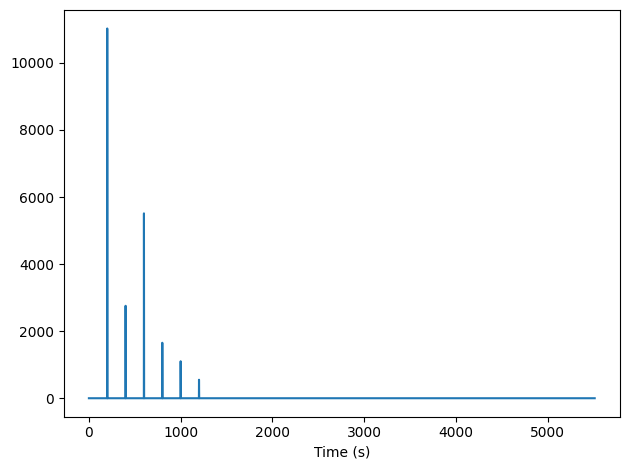

In [62]:
wave = complexSignal.make_wave()
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel = "Time (s)")

wave.normalize()
wave.apodize()
wave.make_audio()

Добавление к сложному сигналу частотных компонент, не кратных основным:

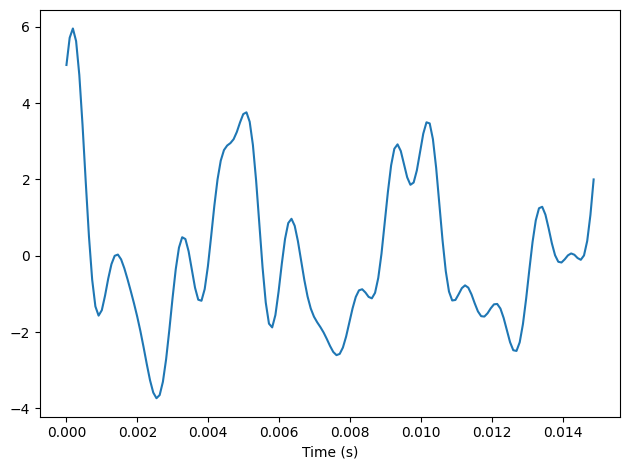

In [63]:
nfSignal = complexSignal + nfSinSig1 + nfSinSig2 + nfSinSig3 + nfCosSig1 + nfCosSig2 + nfCosSig3
nfSignal.plot()
decorate(xlabel = "Time (s)")

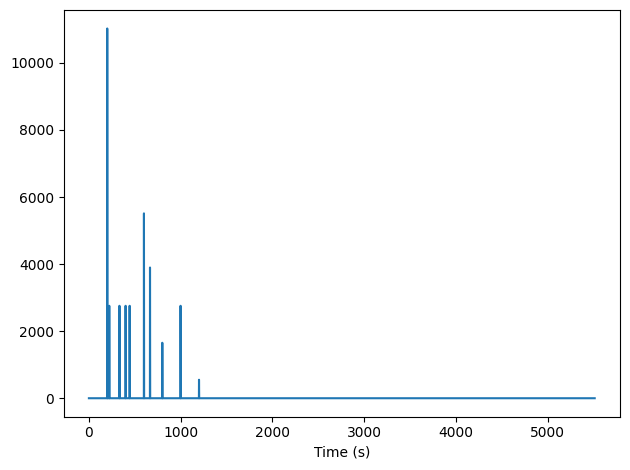

In [64]:
wave = nfSignal.make_wave()
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel = "Time (s)")

wave.normalize()
wave.apodize()
wave.make_audio()

Полученные звуковой сигнал звучит так, будто одновременно воспроизводятся несколько звуковых сигналов.

Упражнение 1.4

In [65]:
def stretch(wave, coeff):
    newWave = wave.copy()
    newWave.ts *= coeff
    newWave.framerate /= coeff
    return newWave

In [73]:
newSegment = stretch(segment, 2)
newSegment.make_audio()